In [1]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [2]:
#convolutional neural network

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
# model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train.reshape(60000, 28, 28, 1),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.8561 - accuracy: 0.7422
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.4909 - accuracy: 0.8362
Epoch 3/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.4019 - accuracy: 0.8603
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.3568 - accuracy: 0.8751
Epoch 5/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.3263 - accuracy: 0.8840
Epoch 6/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.3086 - accuracy: 0.8894
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2921 - accuracy: 0.8953
Epoch 8/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2773 - accuracy: 0.9000
Epoch 9/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.2650 - accuracy: 0.9055
Epoch 10/10
60000/60000 [===============

In [3]:
print(model.evaluate(X_train.reshape(-1, 28, 28, 1), y_train))
print(model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test))

60000/60000 [==============================] - 5s 80us/step
[0.23804426416357358, 0.9150166511535645]
10000/10000 [==============================] - 1s 79us/step
[0.3042007420659065, 0.8902000188827515]


In [4]:
model2 = Sequential()

model2.add(Conv2D(10, 
                  kernel_size=(3, 3), 
                  activation="sigmoid", 
                  input_shape=(28, 28, 1), 
                  weights=model.layers[0].get_weights()))

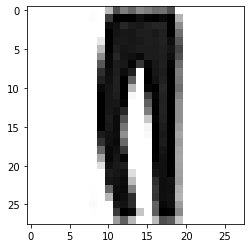

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_test[2], cmap="gray_r")
plt.show()

In [47]:
result = model2.predict(X_test[2].reshape(1, 28, 28, 1))

In [48]:
result.shape

(1, 26, 26, 10)

In [49]:
result[0].shape

(26, 26, 10)

In [50]:
result[0][:, :, 0]

array([[5.44869423e-01, 5.44869423e-01, 5.44869423e-01, 5.44869423e-01,
        5.44869423e-01, 5.44869423e-01, 5.46129465e-01, 2.95629472e-01,
        7.91111870e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.32162716e-08, 9.99999881e-01,
        5.44869423e-01, 5.44869423e-01, 5.44869423e-01, 5.44869423e-01,
        5.44869423e-01, 5.44869423e-01],
       [5.44869423e-01, 5.44869423e-01, 5.44869423e-01, 5.44869423e-01,
        5.44869423e-01, 5.44869423e-01, 5.90464771e-01, 3.31563294e-01,
        1.07638009e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.29021114e-32, 9.99922991e-01,
        5.44869423e-01, 5.44869423e-01, 5.44869423e-01, 5.44869423e-01,
        5.44869423e-01, 5.44869423e-01],
       [5.44869423e-01, 5.44869423e-01, 5.44869423e-01

In [51]:
#Visualisierung der verschiedenen Layer 

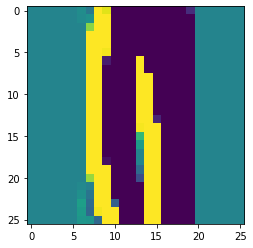

In [52]:
plt.imshow(result[0][:, :, 1])
plt.show()

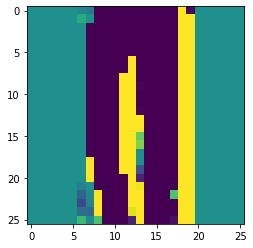

In [53]:
plt.imshow(result[0][:, :, 2])
plt.show()

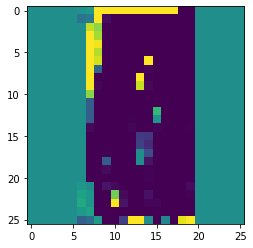

In [54]:
plt.imshow(result[0][:, :, 3])
plt.show()

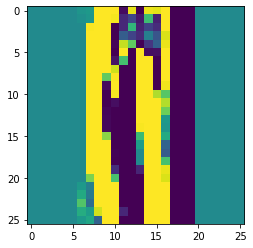

In [55]:
plt.imshow(result[0][:, :, 4])
plt.show()

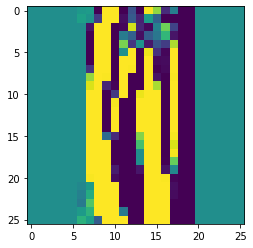

In [56]:
plt.imshow(result[0][:, :, 5])
plt.show()

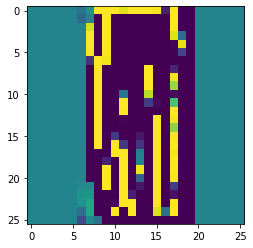

In [57]:
plt.imshow(result[0][:, :, 6])
plt.show()

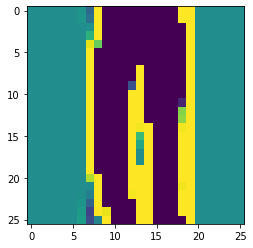

In [58]:
plt.imshow(result[0][:, :, 7])
plt.show()

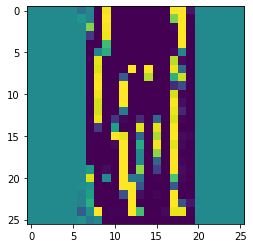

In [59]:
plt.imshow(result[0][:, :, 8])
plt.show()

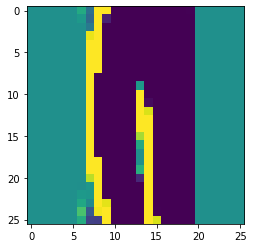

In [60]:
plt.imshow(result[0][:, :, 9])
plt.show()